In [21]:
%matplotlib notebook

import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [19]:
df = pd.DataFrame({'Name': pd.Series([], dtype='str'),
                   'ID' : pd.Series([], dtype='str'),
                   'Ratings': pd.Series([], dtype='int'),
                   'Windows': pd.Series([], dtype='bool'),
                   'Web': pd.Series([], dtype='bool'),
                   'Mac': pd.Series([], dtype='bool'),
                   'Linux': pd.Series([], dtype='bool'),
                  })
rating_re = r'.*?Rated by (\d*) p.*?'
title_re = r'Rate (.*?) by.*'
base_url = r'https://itch.io/jam/gmtk-2020/rate/'

In [8]:
ratings_page = requests.get("https://itch.io/jam/gmtk-2020/entries")
rating_soup = BeautifulSoup(ratings_page.content, 'html.parser')

In [27]:
i = 0
for game in rating_soup.findAll("div", {"class": "game_cell"}):
    #if i > 300:
    #    break    
    i += 1
     
    game_id = game.attrs['data-game_id']
    
    if (df["ID"] == game_id).any():
        i -= 1
        continue
    
    #print(game_id)
    df.to_csv("ratings_data.csv", index = False)
    page = requests.get("https://itch.io/jam/gmtk-2020/rate/" + game_id)
    soup = BeautifulSoup(page.content, 'html.parser')
    rating_div = soup.find("div", {"class": "num_ratings"})
    title_element = soup.find("title")
    ratings = int(re.search(rating_re, str(rating_div)).group(1))
    title = re.search(title_re, str(title_element)).group(1)
    game_str = str(game)
    windows = "filter_windows" in game_str
    mac = "filter_osx" in game_str
    web = "filter_web" in game_str
    linux = "filter_linux" in game_str
    df = df.append({"Name":title, "ID":game_id, "Ratings":ratings,
                   "Windows":windows, "Mac":mac, "Web":web, "Linux":linux}, ignore_index=True)
    time.sleep(0.01)

In [25]:
df

,Name,ID,Ratings,Windows,Web,Mac,Linux
0,Pong v1.4.dev,689097,13,True,False,False,False
1,Take the Wheels!,696092,32,True,False,False,False
2,Herding Chickens,697355,24,False,True,False,False
3,Not Responsive,694459,18,True,False,False,False
4,Skyhigh Saboteur,694314,14,True,False,False,False
5,Board Out Of Control,698043,8,True,False,True,True
6,Laggy Racing,694855,27,True,True,False,False
7,Card Rogue,693875,180,False,True,False,False
8,Werewolf Game Prototype,695070,62,False,True,False,False
9,Exponentia,698736,8,True,False,True,True


<IPython.core.display.Javascript object>


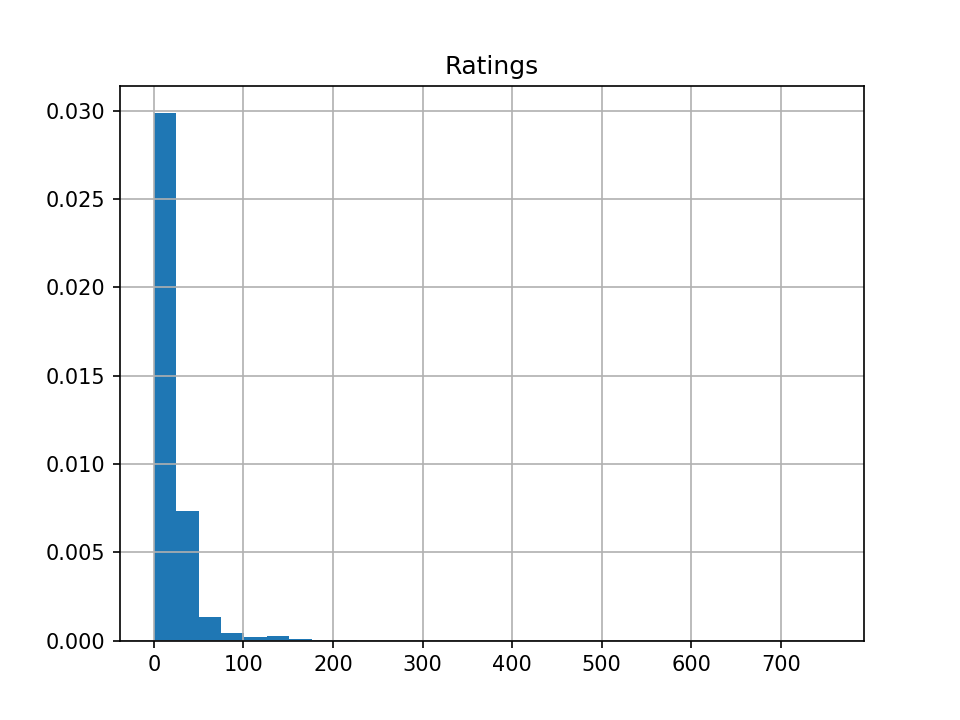

In [30]:

hist = df.hist("Ratings", bins=30, density=True)

<IPython.core.display.Javascript object>


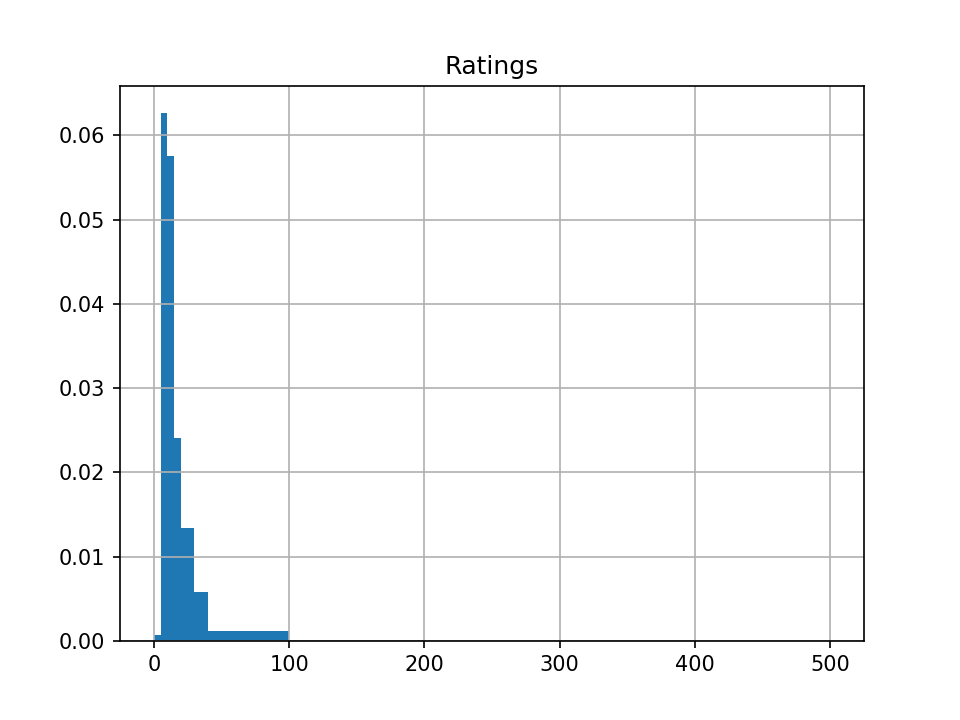

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002216AA91748>]],
      dtype=object)

In [37]:
df[df['Windows'] == True].hist("Ratings", bins=[0,5,10,15,20,30,40,100,200,500], density=True)

<IPython.core.display.Javascript object>


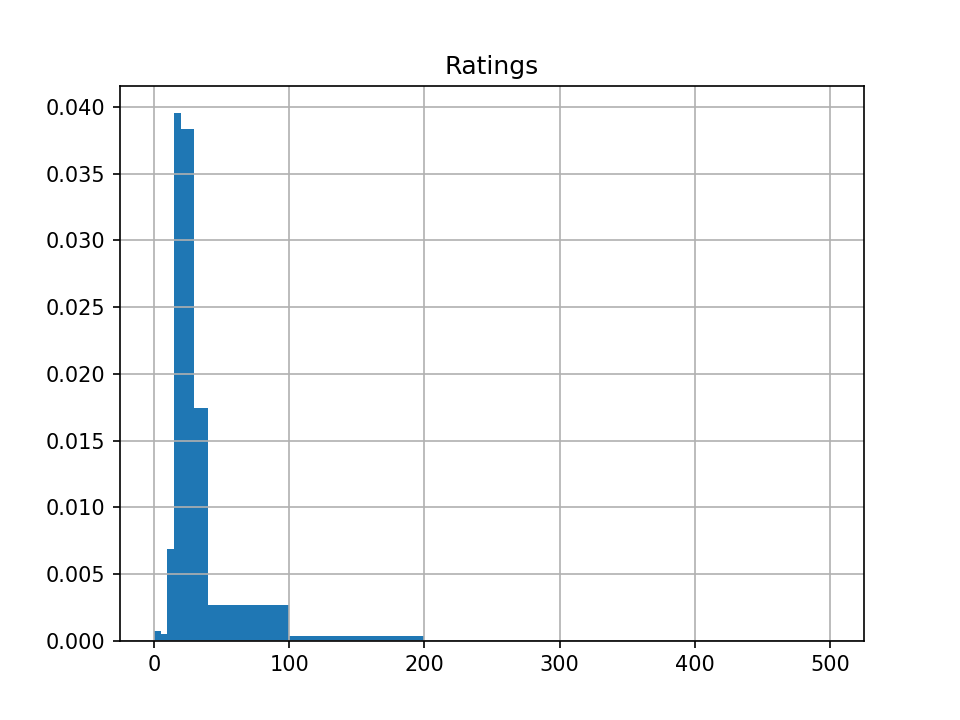

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002216A18E5F8>]],
      dtype=object)

In [38]:
df[df['Web'] == True].hist("Ratings", bins=[0,5,10,15,20,30,40,100,200,500], density=True)

<IPython.core.display.Javascript object>


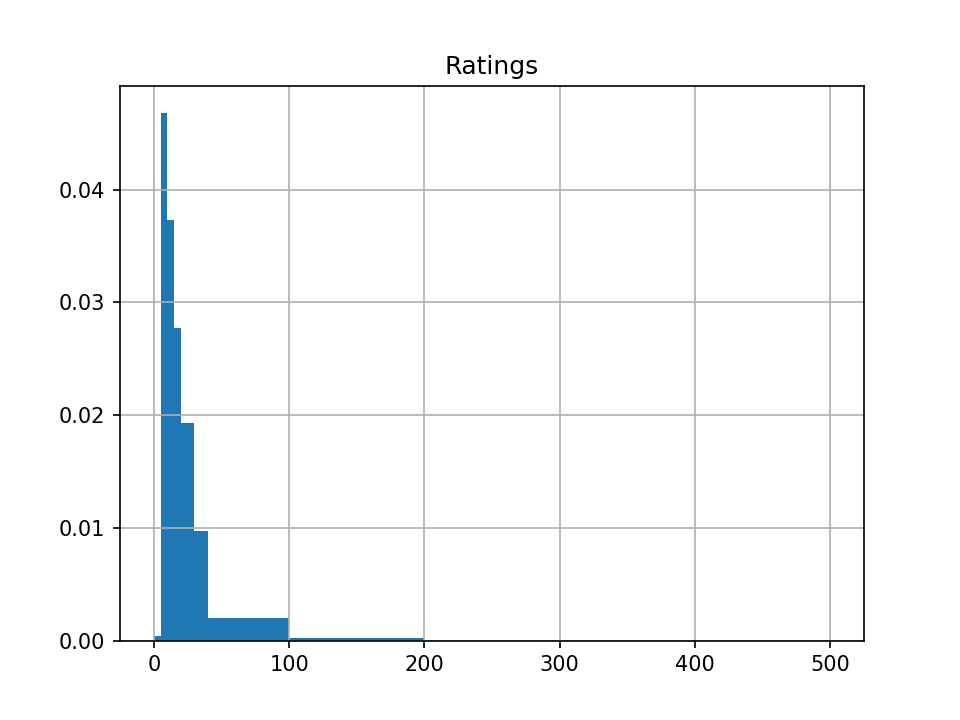

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000221697EA8D0>]],
      dtype=object)

In [39]:
df[df['Mac'] == True].hist("Ratings", bins=[0,5,10,15,20,30,40,100,200,500], density=True)

In [94]:
np.median(df[df['Web'] == False]['Ratings'])

10.0

In [79]:
df[(df['Windows'] == False) & (df['Linux'] == False) & (df['Web'] == False) & (df['Mac'] == False)]

,Name,ID,Ratings,Windows,Web,Mac,Linux
14,International Slice Station,697339,7,False,False,False,False
15,Torpedoh!,698423,8,False,False,False,False
24,Granpa is out of control,696233,9,False,False,False,False
27,Swarm Shot,694225,10,False,False,False,False
49,Joyful Drift,694292,10,False,False,False,False
51,My Friend is a Zombie,699686,16,False,False,False,False
53,Switchboard,697921,8,False,False,False,False
68,Without A Paddle,696899,16,False,False,False,False
77,AttackOnBaby,696981,9,False,False,False,False
81,Wander Guy,696328,8,False,False,False,False


In [92]:
our_ratings = df[df["Name"] == "Takes Two to Disco"]["Ratings"].values[0]
np.sum(df["Ratings"] < our_ratings) / len(df)

0.9309077545020213

In [87]:
len(df)

5442

In [91]:
np.sum(df["Ratings"] < our_ratings)

5066

In [89]:
our_ratings

49

In [90]:
df["Ratings"] < our_ratings


0        True
1        True
2        True
3        True
4        True
5        True
6        True
7       False
8       False
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18      False
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
5412     True
5413     True
5414     True
5415     True
5416     True
5417     True
5418     True
5419     True
5420     True
5421     True
5422     True
5423     True
5424    False
5425     True
5426     True
5427     True
5428     True
5429     True
5430     True
5431     True
5432    False
5433     True
5434     True
5435     True
5436     True
5437     True
5438     True
5439     True
5440     True
5441     True
Name: Ratings, Length: 5442, dtype: bool